For any questions, first read the DOCUMENTATION. Secondly have a look in the classes "ExperimentClass.py" and "InvestigationClass.py". Last but not least, you can ask the author of this Code "Leonard Freisem" for further help.

The following code can be used for a fast investigation of the measurements. It prvides information such as the standard deviation of each sensormeasurement around the FC-Stack and can be used for plotting and saving of any other measurement data related treatment.
Follow the next steps to observe your Data.

Therefore, you will need Measurement Data and Noise Data.


In [1]:
from tracemalloc import stop
from turtle import color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from collectAllMeasureDataInOneFile import*
import seaborn as sns
from DynamicExperimentClass import*


In the following chose the measurement folder for the noise and set the measurement files.

In [2]:
noiseBFieldPath = r'Z:\09-Data\00-Thesis\00_TestBench_Ini\2025-07-09\Cable\\'
filenamenoiseAV = "MesuresBruitStartAlimOn.lvm"

bFieldPath = r'Z:\09-Data\00-Thesis\00_TestBench_Ini\2025-07-09\Cable\\'
filenameAV = "10A-Cable.lvm"                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measurementName = "Ref 10 A"
noiseName = "Noise 0 A"

refExperiment = DynamicExperiment(measurementName, bFieldPath, filenameAV, "lvm", noiseName, noiseBFieldPath, filenamenoiseAV, "lvm")



In the following chose the measurement folder for the noise and set the measurement files. Set here the INVESTIGATION MEASUREMENT!!!


In [3]:
noiseBFieldPath = r'Z:\09-Data\00-Thesis\00_TestBench_Ini\2025-07-09\Cable\\'
filenamenoiseAV = "MesuresBruitStartAlimOn.lvm"

bFieldPath = r"Z:\09-Data\00-Thesis\00_TestBench_Ini\2025-07-09\Cable\\"
filenameAV = "-10A-Cable.lvm"                     ###!!!!!!!!-----------> Change here <-----------!!!!!!!!!!!!!!!!

measurementName = "Ref -10 A"
noiseName = "Noise 0A"

faultyExperiment = DynamicExperiment(measurementName, bFieldPath, filenameAV, "lvm", noiseName, noiseBFieldPath, filenamenoiseAV, "lvm")


Run these lines to obtain a list of Axial and Radial Sensors, you can work with:

In [4]:
print("Radial Sensors:")
print(refExperiment.dataMeasurement.get_all_Names_RadialSensors())
print("Axial Sensors:")
print(refExperiment.dataMeasurement.get_all_Names_AxialSensors())

Radial Sensors:
['S0133-Rad', 'S0234-Rad', 'S0335-Rad', 'S0436-Rad', 'S0537-Rad', 'S0638-Rad', 'S0739-Rad', 'S0840-Rad', 'S0941-Rad', 'S1042-Rad', 'S1143-Rad', 'S1244-Rad', 'S1345-Rad', 'S1446-Rad', 'S1547-Rad', 'S1648-Rad', 'S1749-Rad', 'S1850-Rad', 'S1951-Rad', 'S2052-Rad', 'S2153-Rad', 'S2254-Rad', 'S2355-Rad', 'S2456-Rad', 'S2557-Rad', 'S2658-Rad', 'S2759-Rad', 'S2860-Rad', 'S2961-Rad', 'S3062-Rad', 'S3163-Rad', 'S3264-Rad']
Axial Sensors:
['S0133-Ax', 'S0234-Ax', 'S0335-Ax', 'S0436-Ax', 'S0537-Ax', 'S0638-Ax', 'S0739-Ax', 'S0840-Ax', 'S0941-Ax', 'S1042-Ax', 'S1143-Ax', 'S1244-Ax', 'S1345-Ax', 'S1446-Ax', 'S1547-Ax', 'S1648-Ax', 'S1749-Ax', 'S1850-Ax', 'S1951-Ax', 'S2052-Ax', 'S2153-Ax', 'S2254-Ax', 'S2355-Ax', 'S2456-Ax', 'S2557-Ax', 'S2658-Ax', 'S2759-Ax', 'S2860-Ax', 'S2961-Ax', 'S3062-Ax', 'S3163-Ax', 'S3264-Ax']


Radial measurements:
Hear you can observe the sensor measurements over time.
Therefore we will split the Sensors in X-Pos, X-Neg, Y-Pos and Y-Neg (See technical Drawing)

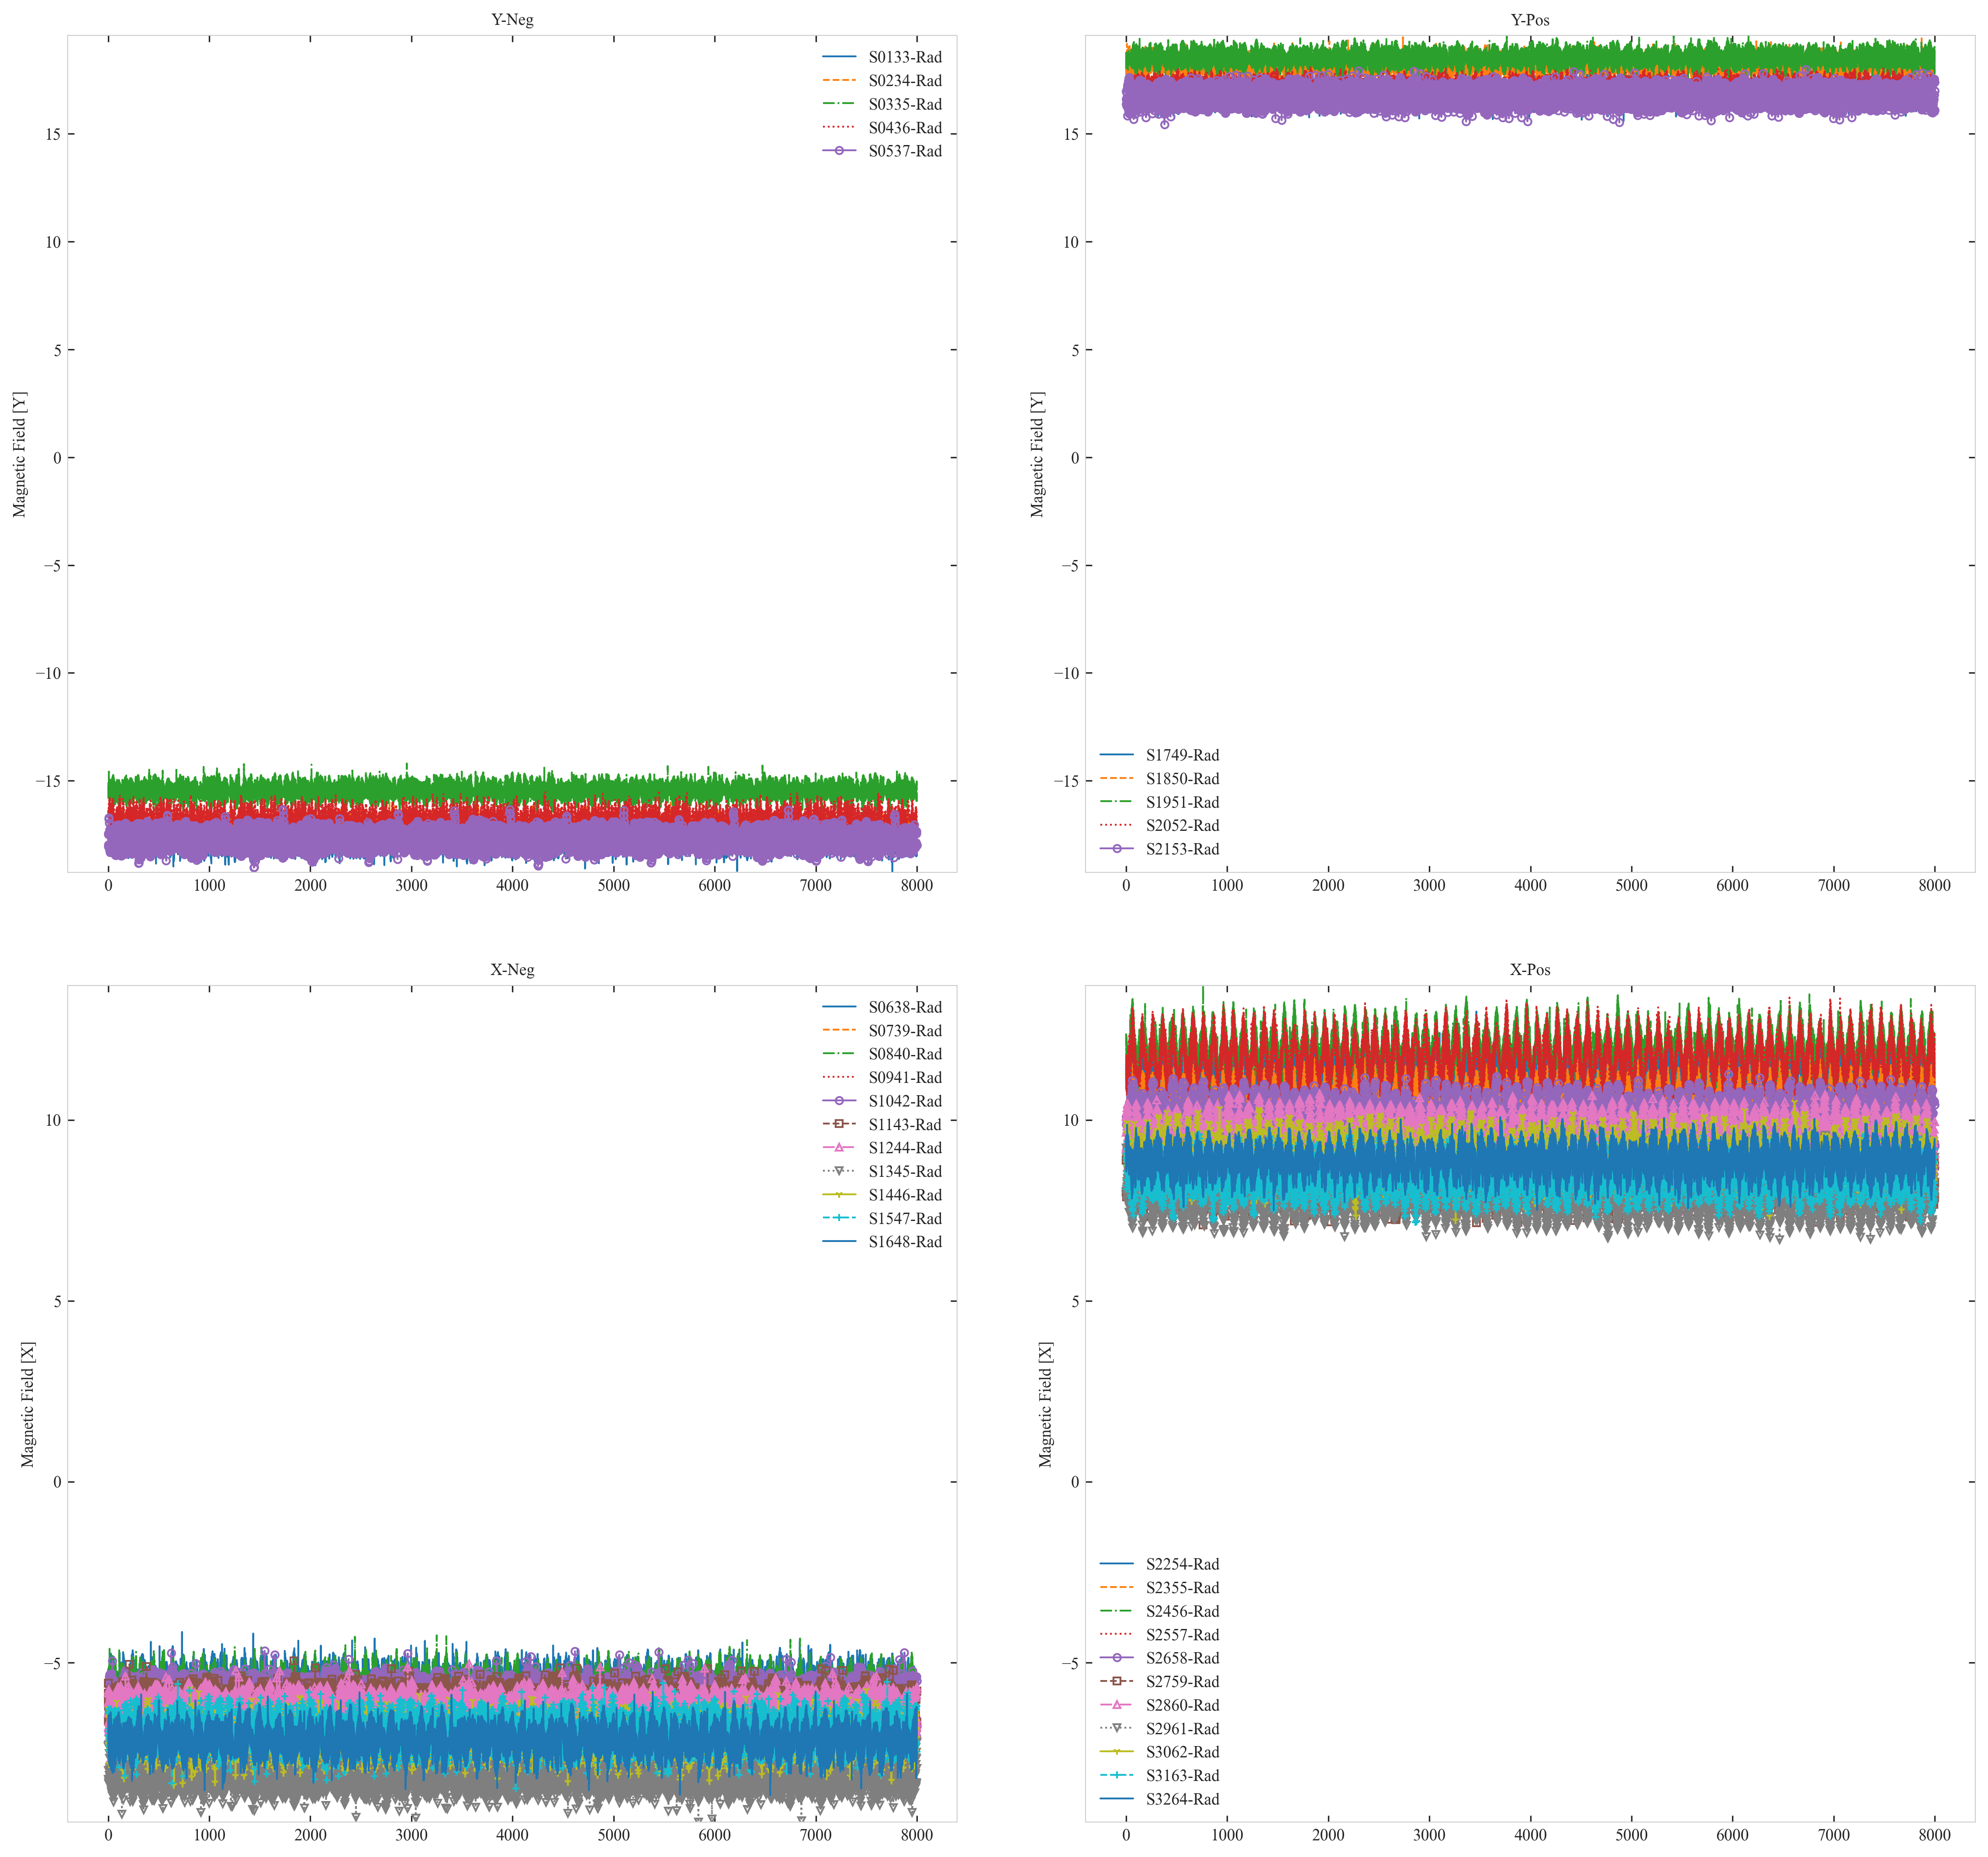

In [5]:
Y_Neg = ['S0133-Rad', 'S0234-Rad', 'S0335-Rad', 'S0436-Rad', 'S0537-Rad']
X_Neg = ['S0638-Rad', 'S0739-Rad', 'S0840-Rad', 'S0941-Rad', 'S1042-Rad', 'S1143-Rad', 'S1244-Rad', 'S1345-Rad', 'S1446-Rad', 'S1547-Rad', 'S1648-Rad']
Y_Pos = ['S1749-Rad', 'S1850-Rad', 'S1951-Rad', 'S2052-Rad', 'S2153-Rad']
X_Pos = ['S2254-Rad', 'S2355-Rad', 'S2456-Rad', 'S2557-Rad', 'S2658-Rad', 'S2759-Rad', 'S2860-Rad', 'S2961-Rad', 'S3062-Rad', 'S3163-Rad', 'S3264-Rad']

sensors_of_Interest = [Y_Neg, X_Neg, Y_Pos, X_Pos]

faultyExperiment.noiseMeasurement.plot_Field_measurement_over_time(sensors_of_Interest)

If we are not sure about noise impact, we can plot a violin plot or a gauss curve

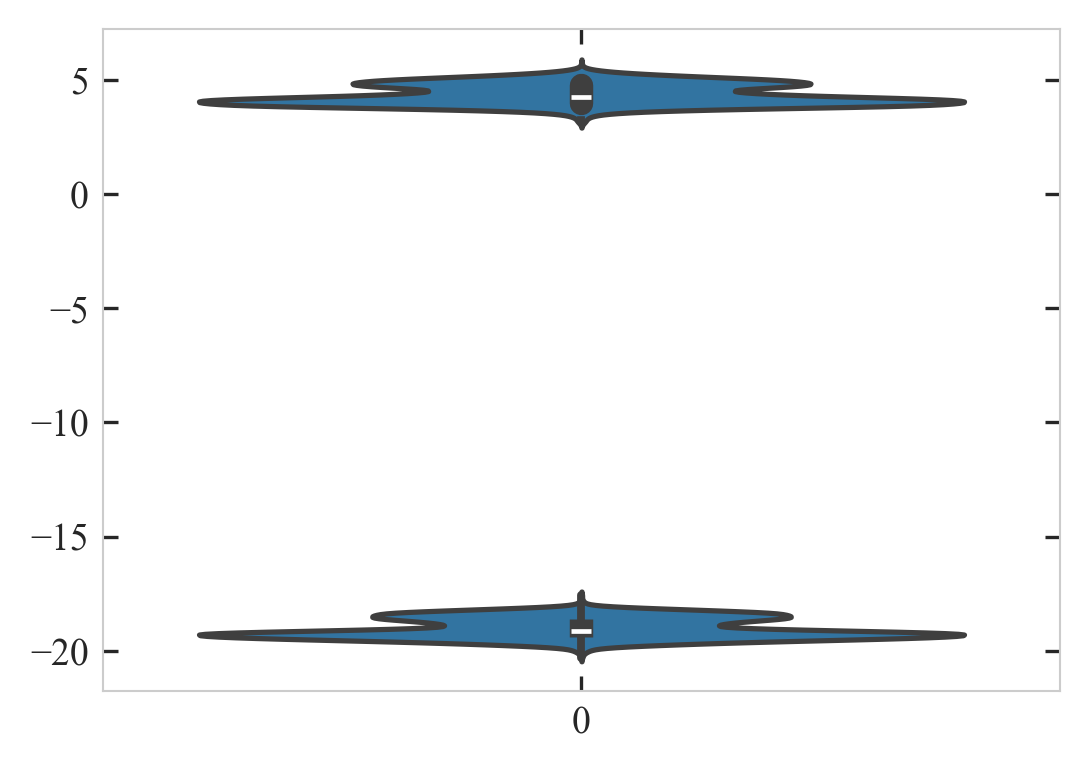

In [23]:
# for a violin plot:
faultyExperiment.dataMeasurement.get_series_by_name("S1547-Rad").violinPlotForData()
# for a violin plot:
faultyExperiment.dataMeasurement.get_series_by_name("S1648-Rad").violinPlotForData()

Based on the previous visualization we decide to remove outliers. Appends a data series to the measurementset with "Name of the Series - outliersRemoved - threshold"

S1547-Rad-Filtered-1
S1547-Rad-Filtered-4
-0.06995466725
-0.06995466725
-0.07073533238980996


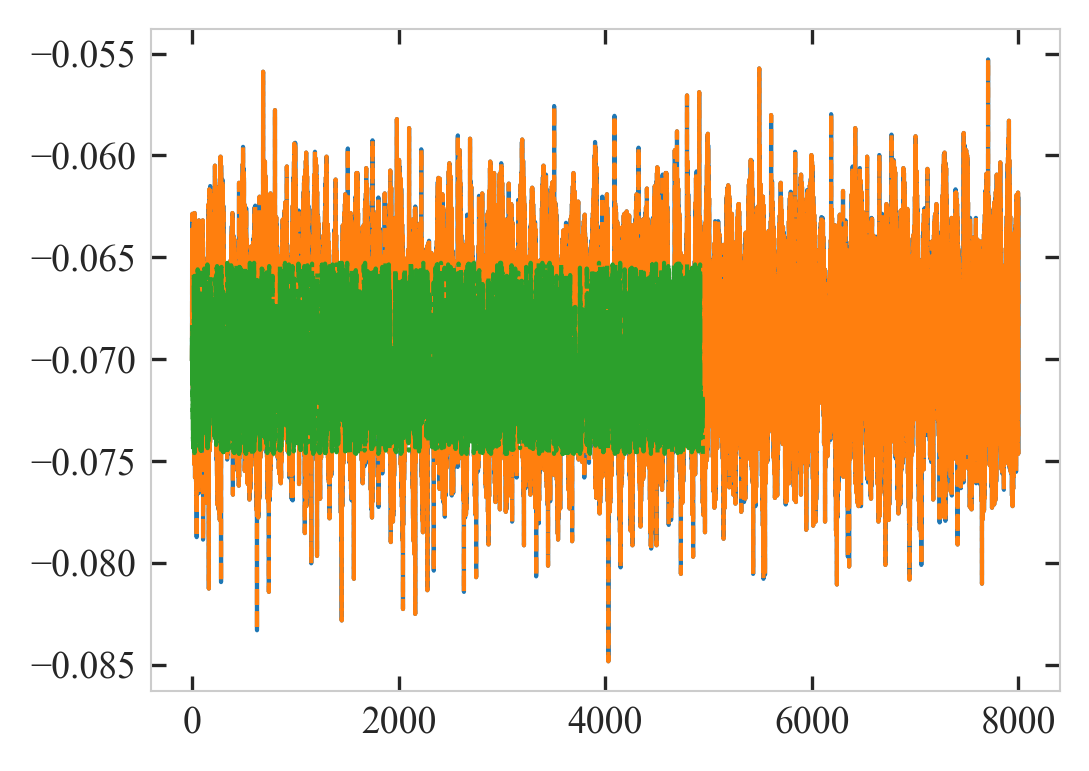

In [7]:
faultyExperiment.noiseMeasurement.createNewSeriesAndRemoveOutliersFromSeries("S1547-Rad", threshold=1)
faultyExperiment.noiseMeasurement.createNewSeriesAndRemoveOutliersFromSeries("S1547-Rad", threshold=4)

len(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad").data_series)
len(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad-Filtered-4").data_series)
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad").calculate_mean())
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad-Filtered-4").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad-Filtered-4").calculate_mean())
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad-Filtered-1").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1547-Rad-Filtered-1").calculate_mean())


S1042-Rad-Filtered-1
S1042-Rad-Filtered-4
-0.060944480499999995
-0.060944480499999995
-0.061839778700141734


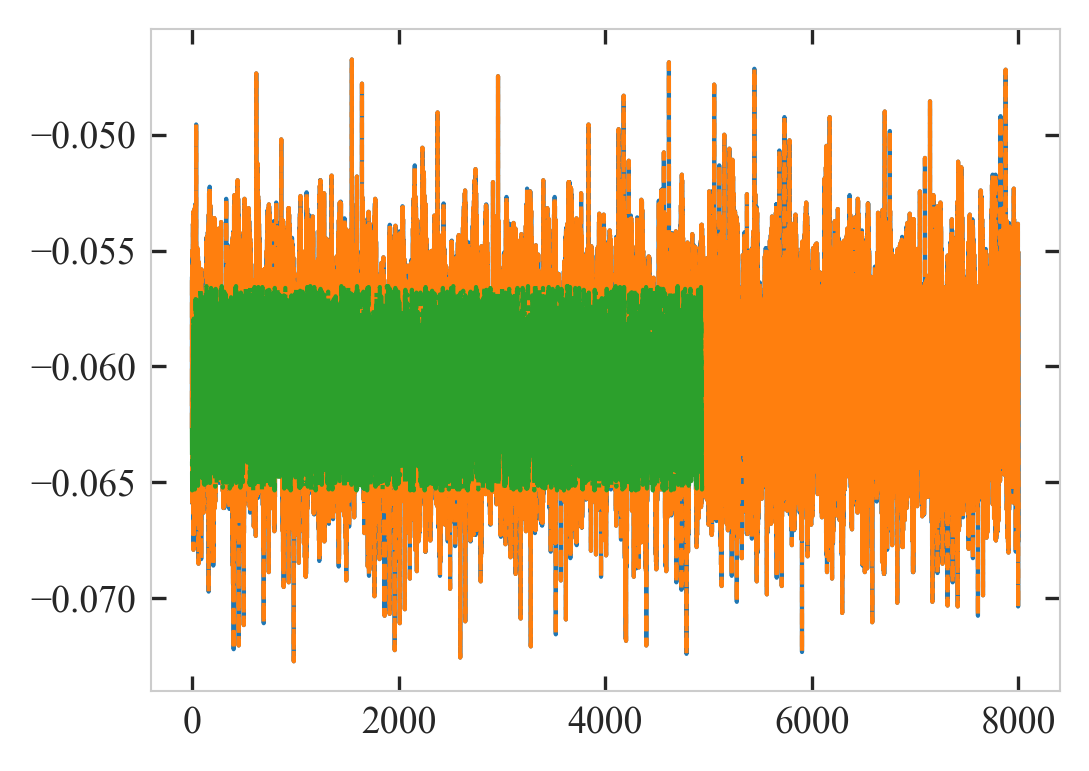

In [8]:
faultyExperiment.noiseMeasurement.createNewSeriesAndRemoveOutliersFromSeries("S1042-Rad", threshold=1)
faultyExperiment.noiseMeasurement.createNewSeriesAndRemoveOutliersFromSeries("S1042-Rad", threshold=4)

len(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").data_series)
len(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad-Filtered-4").data_series)
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").calculate_mean())
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad-Filtered-4").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad-Filtered-4").calculate_mean())
plt.plot(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad-Filtered-1").data_series.values())
print(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad-Filtered-1").calculate_mean())

Check for 0-1000 Measurement Points

S1042-Rad - Time Span 0-1000
1000
Original Data Series Mean:-0.060944480499999995
1000
-0.060942548
615
-0.06174628292682927


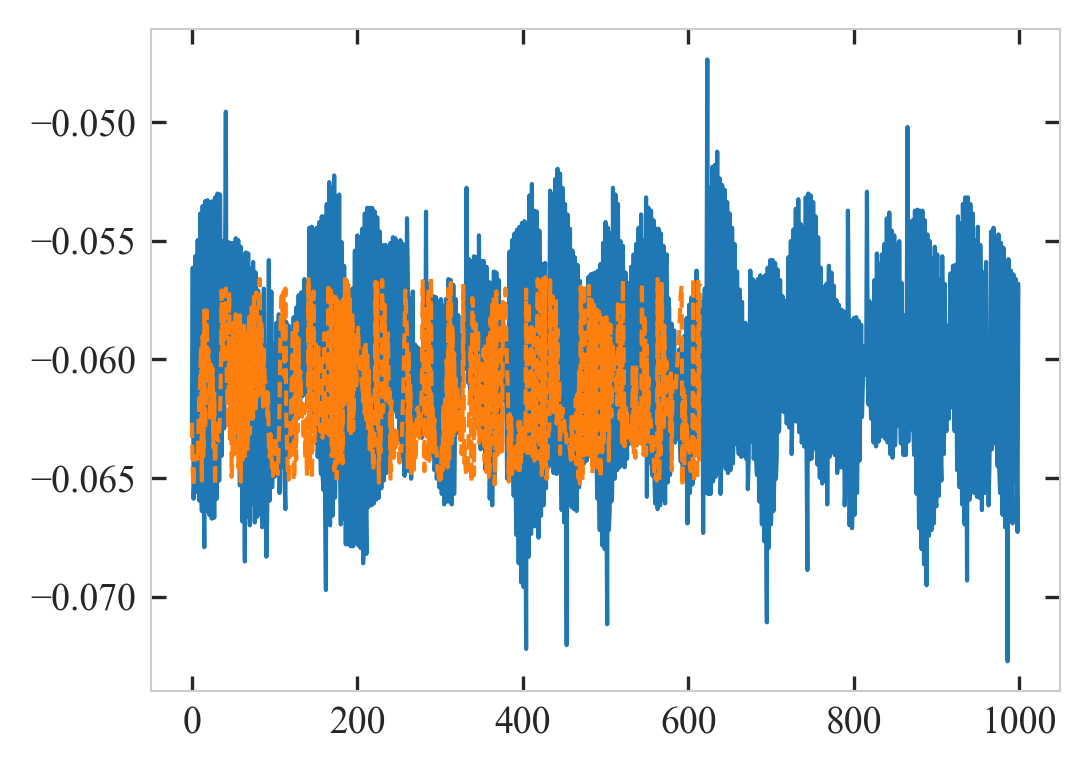

In [9]:
shortedMeasurement = faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").get_series_in_span(0,1000)
print(shortedMeasurement.name)
print(len(shortedMeasurement.data_series.values()))


print("Original Data Series Mean:" + str(faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").calculate_mean()))
shortedMeasurementFiltered4 = shortedMeasurement.get_filtered_series(4)
print(len(shortedMeasurementFiltered4.data_series))
print(shortedMeasurementFiltered4.calculate_mean())

shortedMeasurementFiltered1 = shortedMeasurement.get_filtered_series(1)
print(len(shortedMeasurementFiltered1.data_series))
print(shortedMeasurementFiltered1.calculate_mean())




plt.plot(shortedMeasurementFiltered4.data_series.values())
plt.plot(shortedMeasurementFiltered1.data_series.values())

Check for 0 - 3000 elements

S1042-Rad - Time Span 0-3000
3000
3000
-0.06090974133333333
1836
-0.061747850762527236


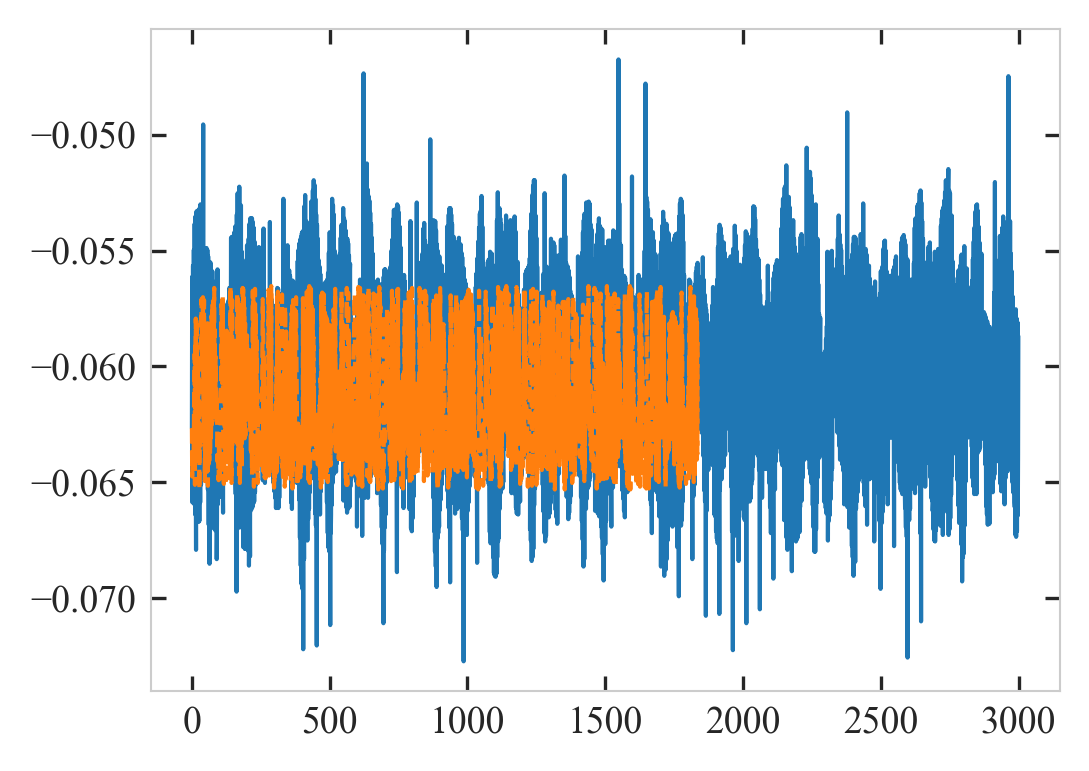

In [10]:
shortedMeasurement = faultyExperiment.noiseMeasurement.get_series_by_name("S1042-Rad").get_series_in_span(0,3000)
print(shortedMeasurement.name)
print(len(shortedMeasurement.data_series.values()))

shortedMeasurementFiltered4 = shortedMeasurement.get_filtered_series(4)
print(len(shortedMeasurementFiltered4.data_series))
print(shortedMeasurementFiltered4.calculate_mean())

shortedMeasurementFiltered1 = shortedMeasurement.get_filtered_series(1)
print(len(shortedMeasurementFiltered1.data_series))
print(shortedMeasurementFiltered1.calculate_mean())




plt.plot(shortedMeasurementFiltered4.data_series.values())
plt.plot(shortedMeasurementFiltered1.data_series.values())

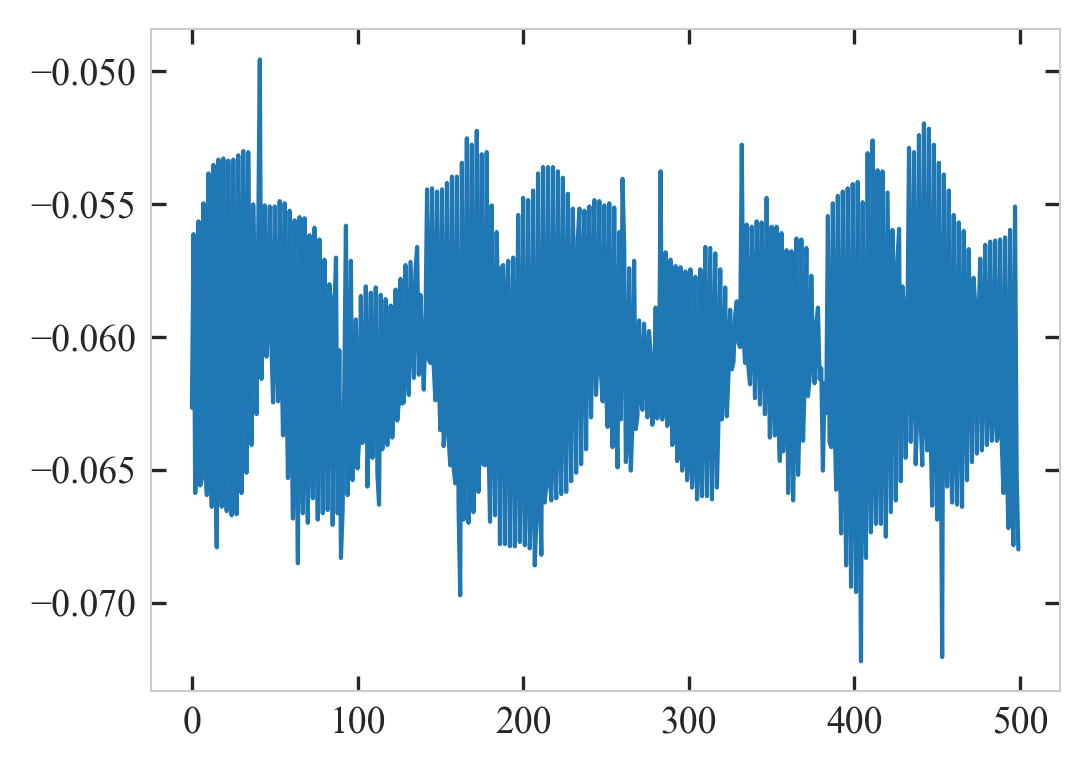

In [11]:
timespan = list(shortedMeasurement.data_series.keys())[0 : 500]
filtered_data = {t: d for t, d in shortedMeasurement.data_series.items() if t in timespan}
plt.plot(filtered_data.values())


We can observe the Impact with a violin plot:

In [12]:
# plot here violin plot --> bug must be fixed in fucntion for violin plot

We can plot the current to observe, if the measured system was already in stationary mode.

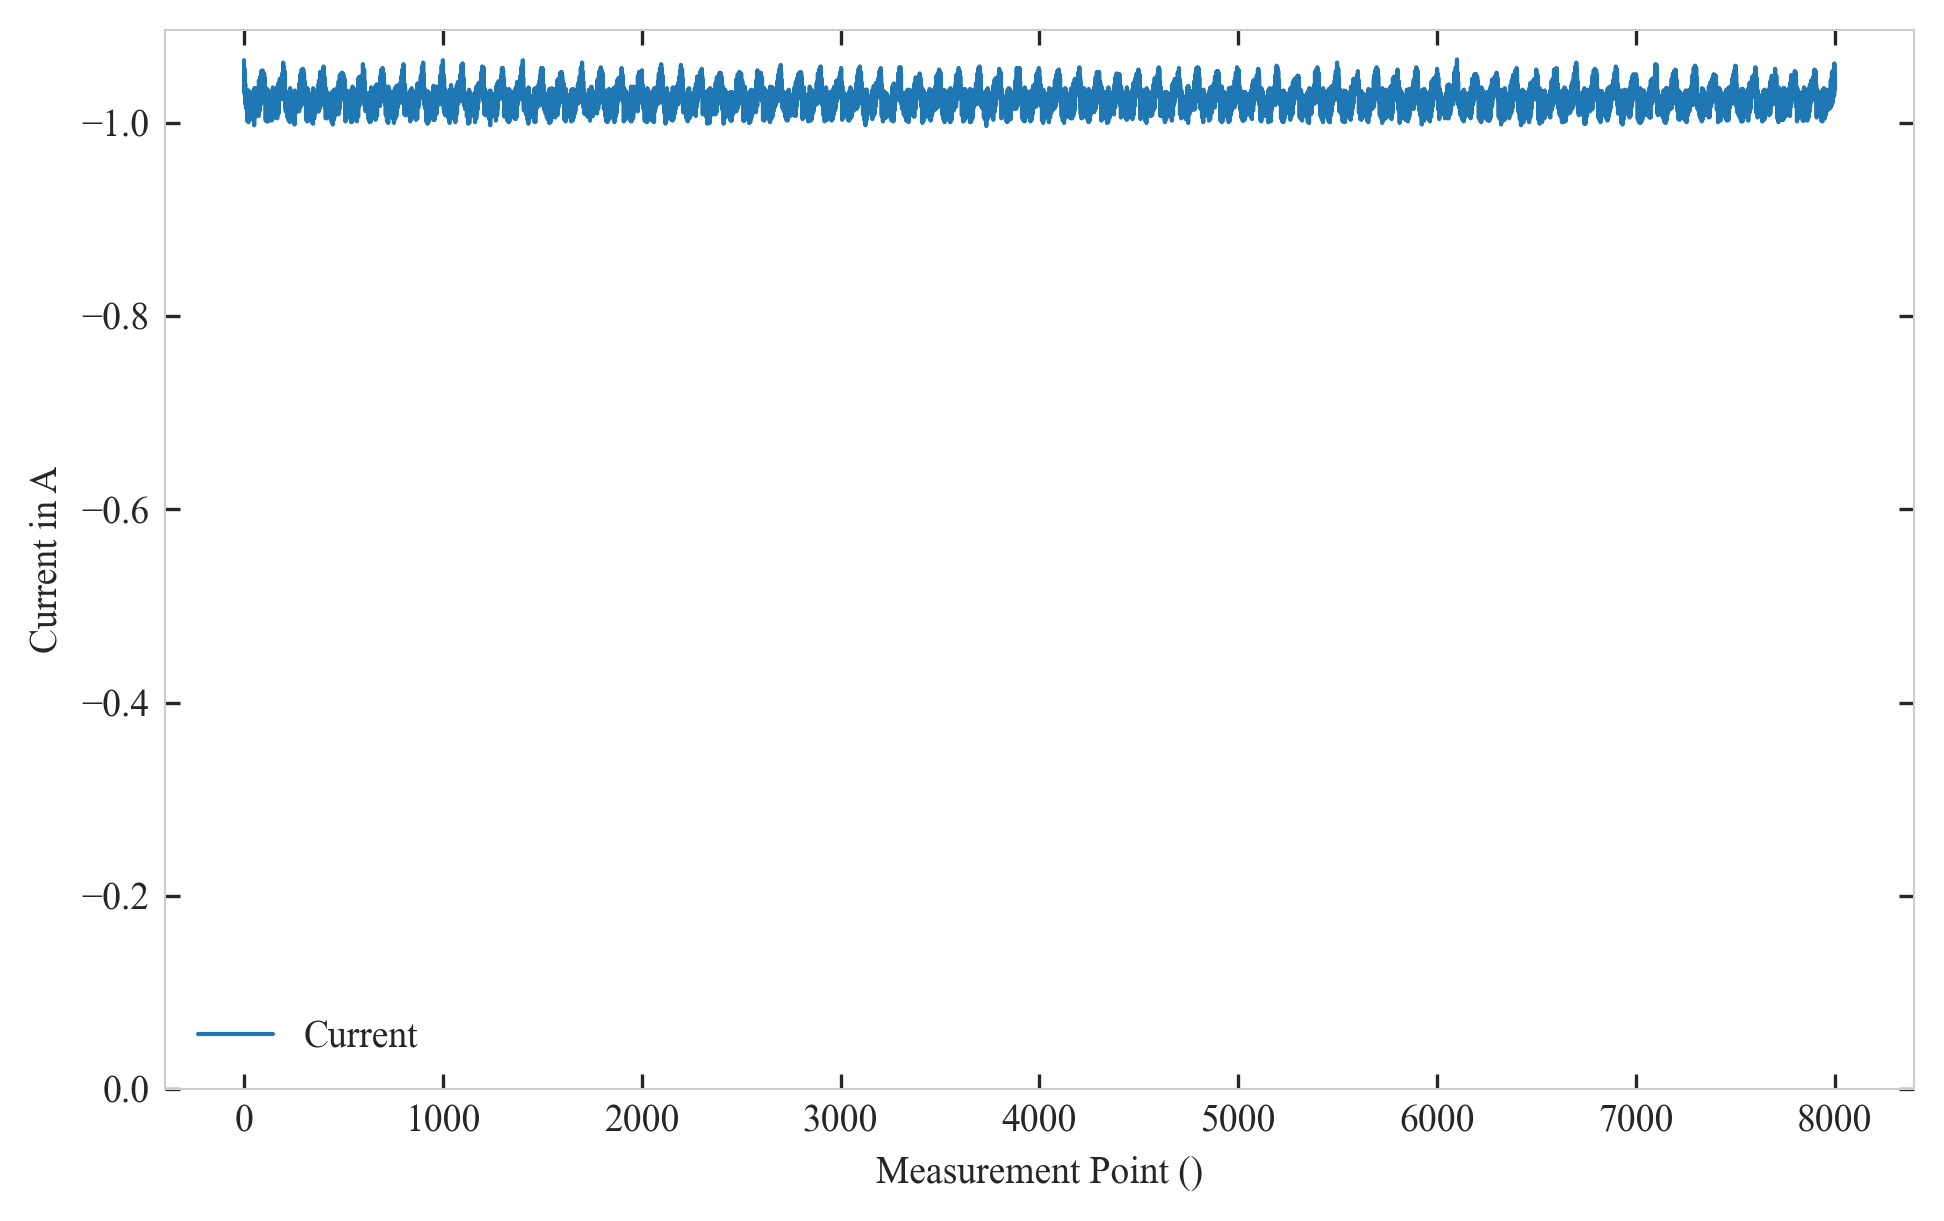

In [13]:
faultyExperiment.dataMeasurement.plot_current_measurement_over_time()

Pass a text file with the sensor positions in order to obtain for each sensor its location in space

In [14]:
faultyExperiment.dataMeasurement.pass_sensor_positions(r"Z:\06-Sensors\01-SensorPositions\2024-Leonard\Pos\2025-06-17-SensorPositionsWithOneAsField.txt")
faultyExperiment.noiseMeasurement.pass_sensor_positions(r"Z:\06-Sensors\01-SensorPositions\2024-Leonard\Pos\2025-06-17-SensorPositionsWithOneAsField.txt")

Compute angle of each sensor in space

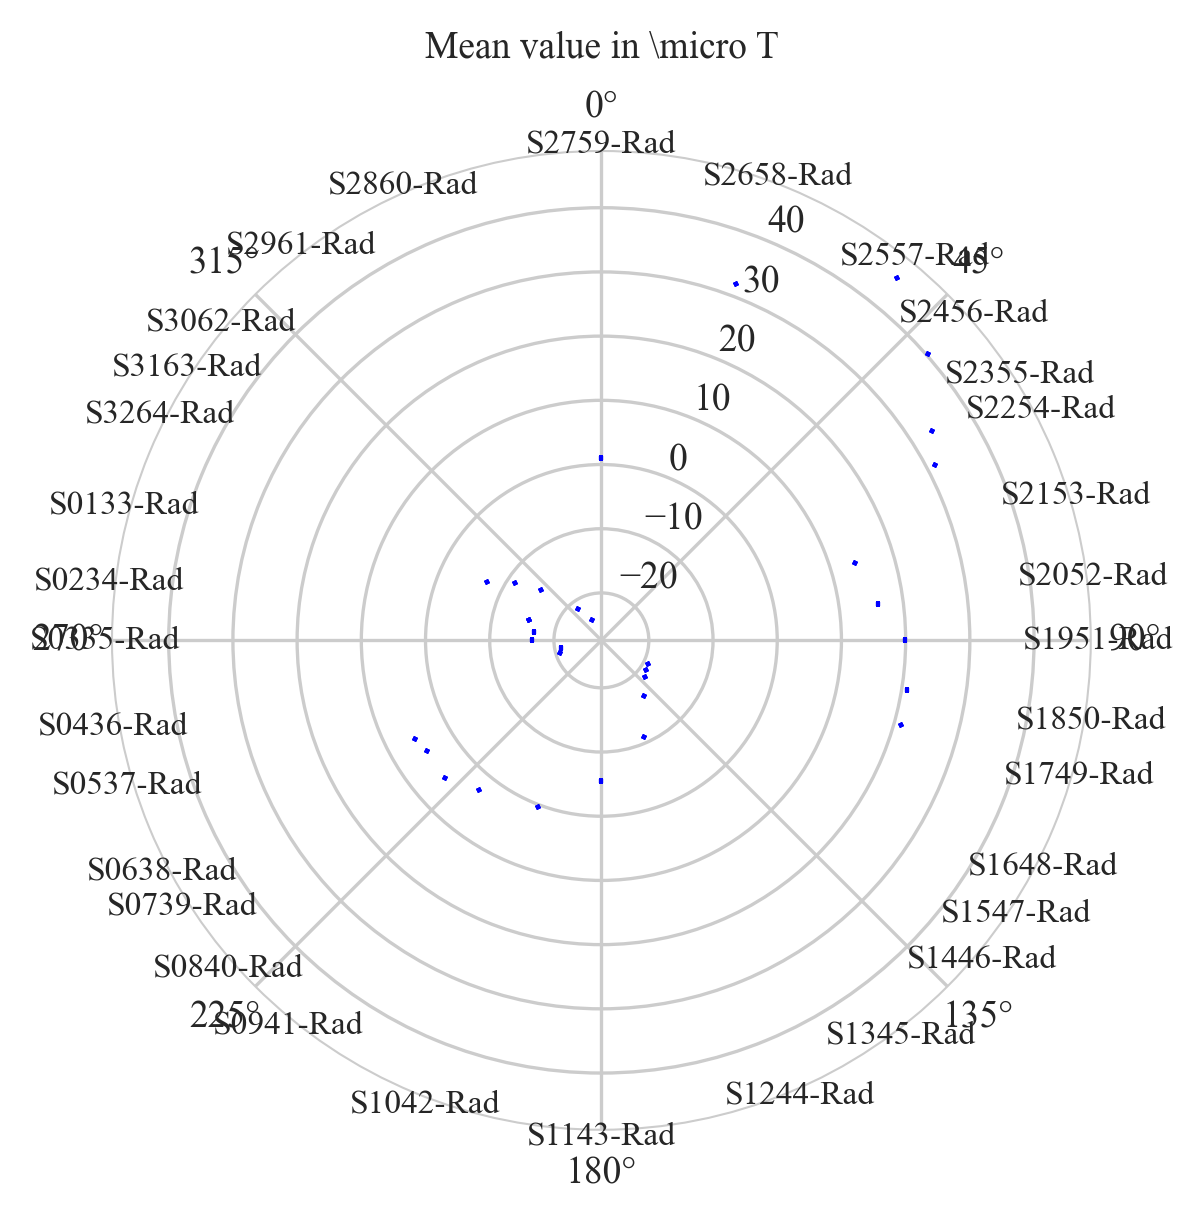

In [15]:

faultyExperiment.dataMeasurement.plot_polar_Mean_fixed_sensors(faultyExperiment.dataMeasurement.get_all_Names_RadialSensors())

Plot std for each sensor

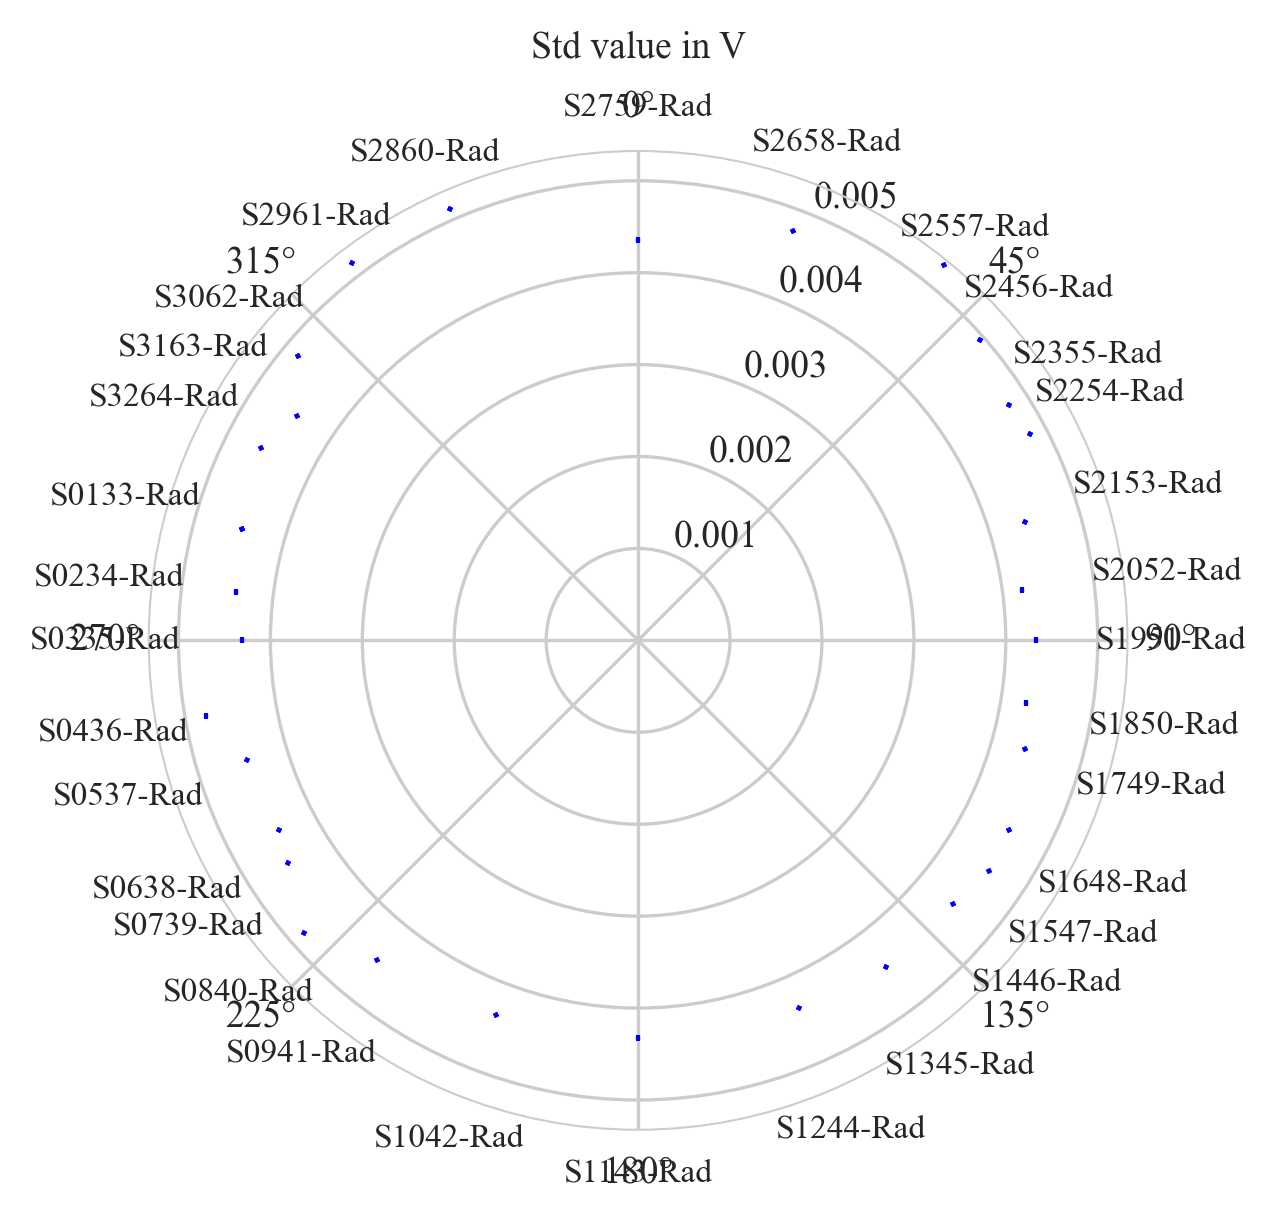

In [16]:
faultyExperiment.dataMeasurement.plot_polar_STD_fixed_sensors(faultyExperiment.dataMeasurement.get_all_Names_RadialSensors())

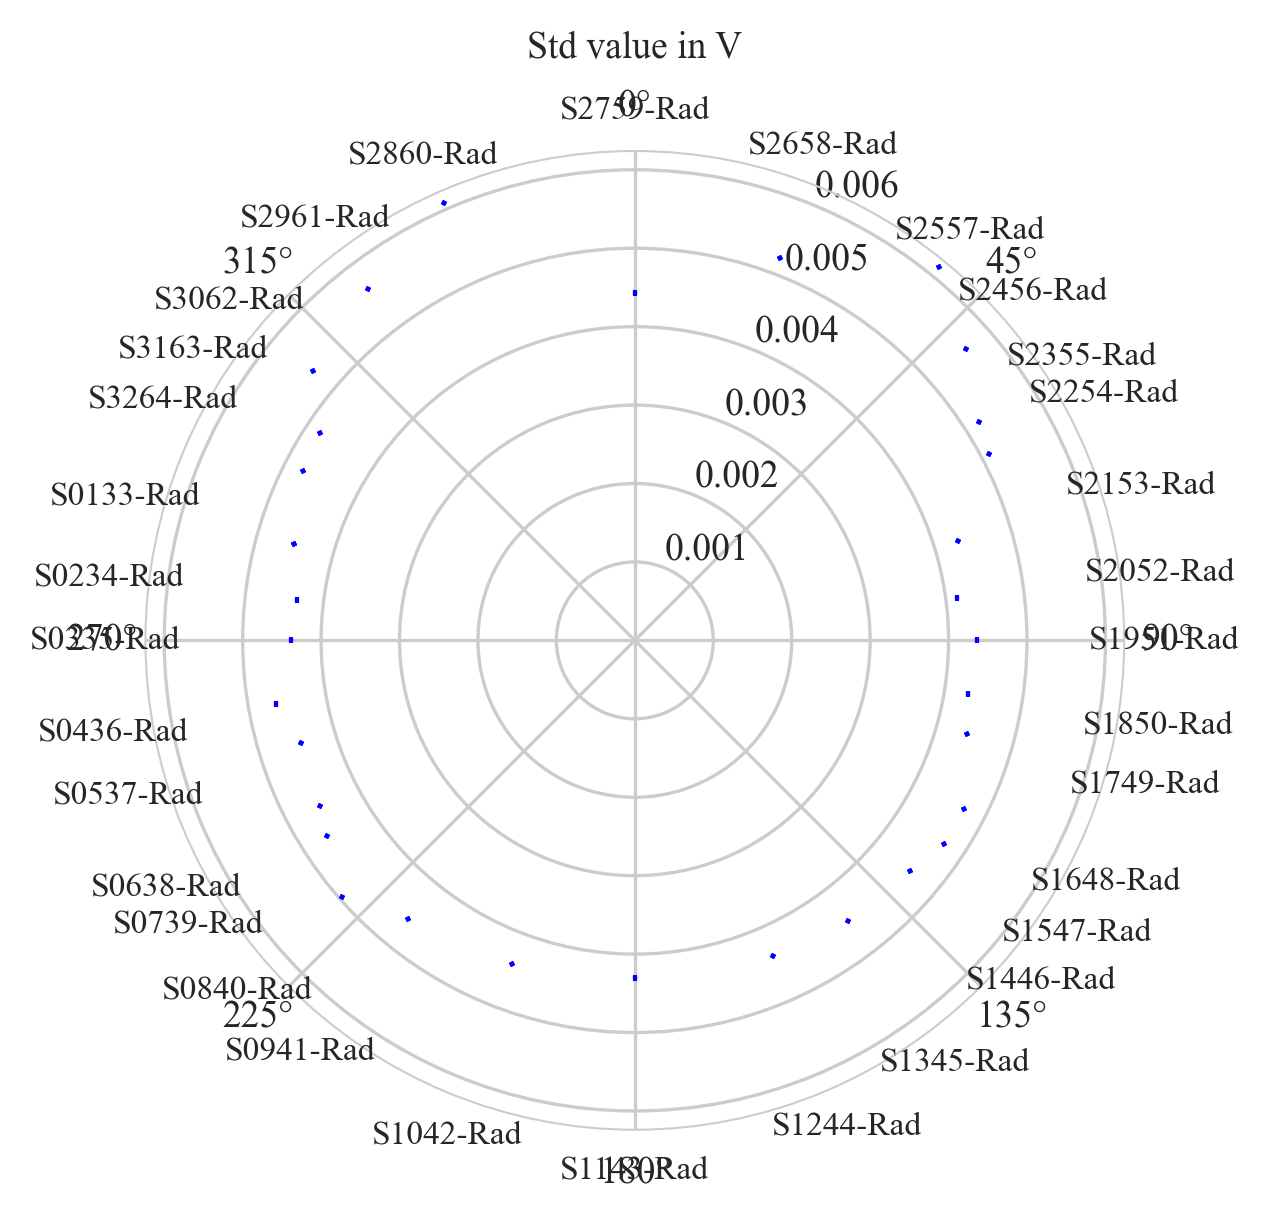

In [17]:
faultyExperiment.noiseMeasurement.plot_polar_STD_fixed_sensors(faultyExperiment.noiseMeasurement.get_all_Names_RadialSensors())


Once you cleaned your data, you can plot the noise cleaned data in a polar plot:

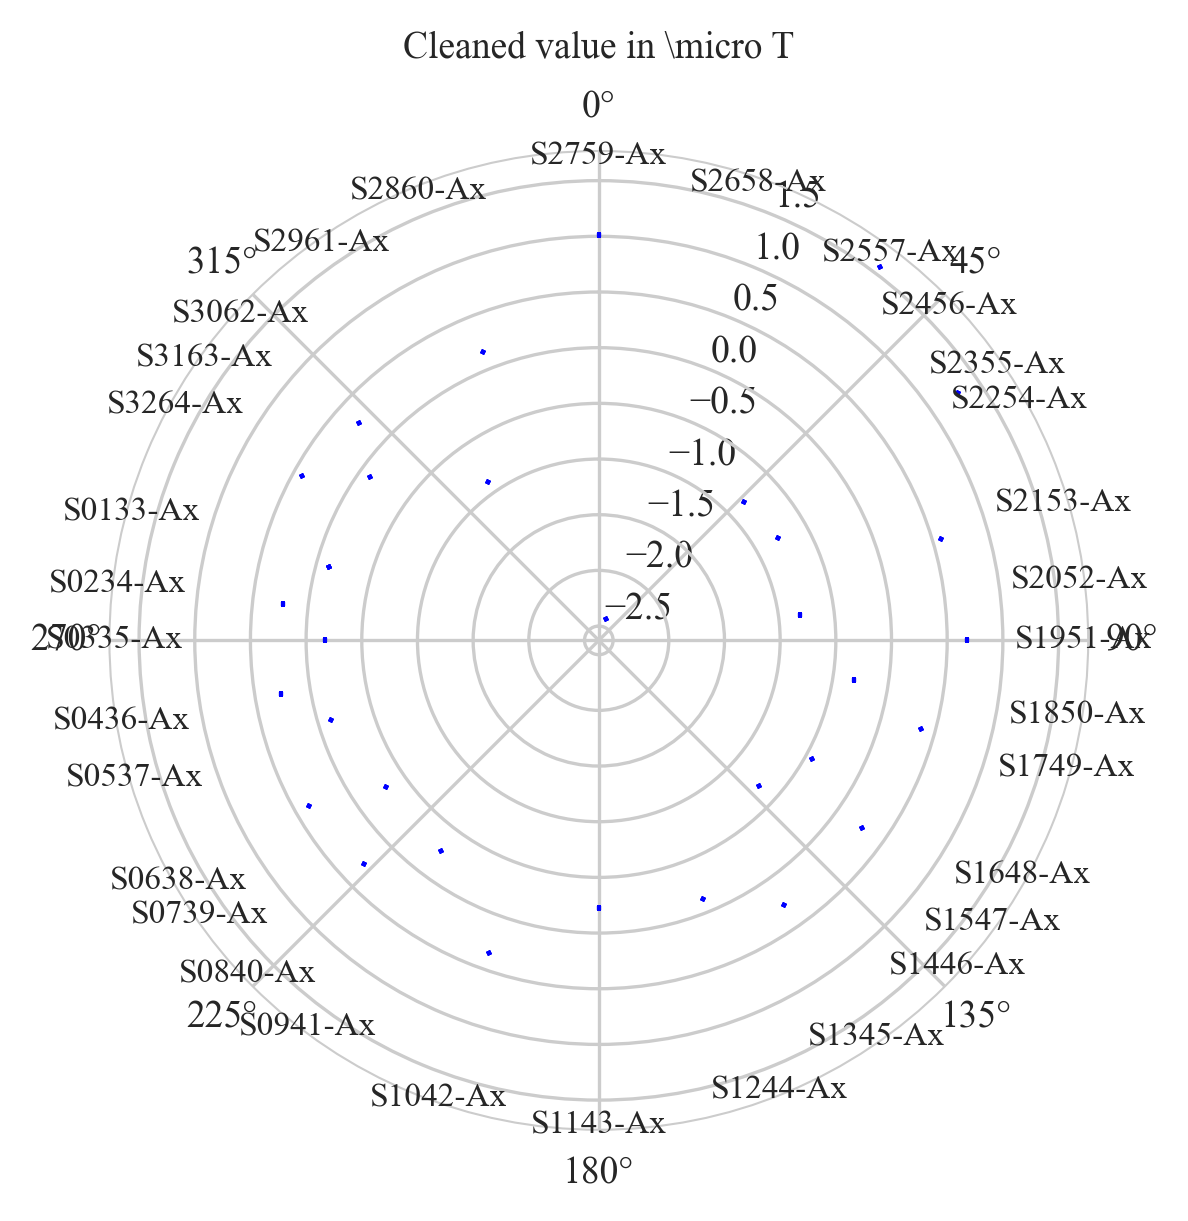

In [18]:
# Therefor we must clean the ambiance noise from the data:
faultyExperiment.clearAllNoiseFromBFieldMeasurements()

# Afterwards we can plot the data:
faultyExperiment.plot_polar_Mean_for_CleanedValues_fixed_sensors(faultyExperiment.dataMeasurement.get_all_Names_AxialSensors())

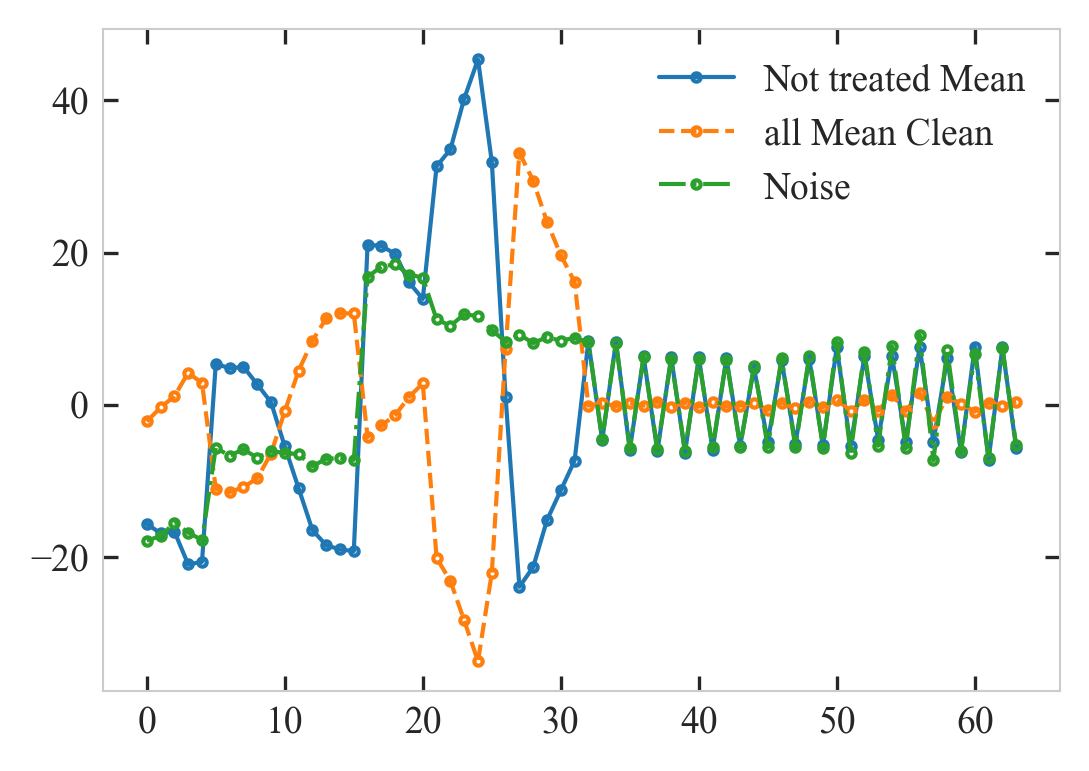

In [19]:
allMeanClean = faultyExperiment.dataMeasurement.get_All_Cleaned_Data()
allMean = faultyExperiment.dataMeasurement.get_All_Mean_Data()
noiseField = faultyExperiment.noiseMeasurement.get_All_Mean_Data()
plt.plot(allMean.values(), label = "Not treated Mean", marker = '.')
plt.plot(allMeanClean.values(), label = "all Mean Clean", marker = '.')
plt.plot(noiseField.values(),label="Noise", marker = '.')
plt.legend()


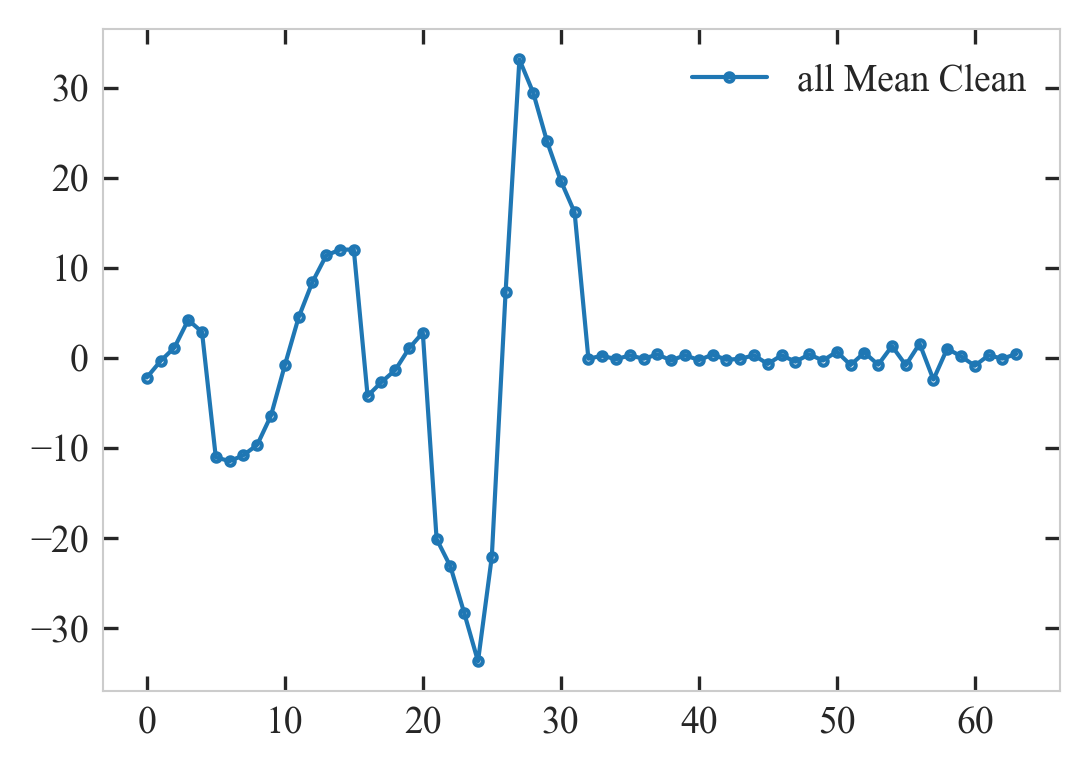

In [20]:
allMeanClean = faultyExperiment.dataMeasurement.get_All_Cleaned_Data()
allMean = faultyExperiment.dataMeasurement.get_All_Mean_Data()
noiseField = faultyExperiment.noiseMeasurement.get_All_Mean_Data()
# plt.plot(allMean.values(), label = "Not treated Mean")
plt.plot(allMeanClean.values(), label = "all Mean Clean", marker = '.')
# plt.plot(noiseField.values(),label="Noise")
plt.legend()

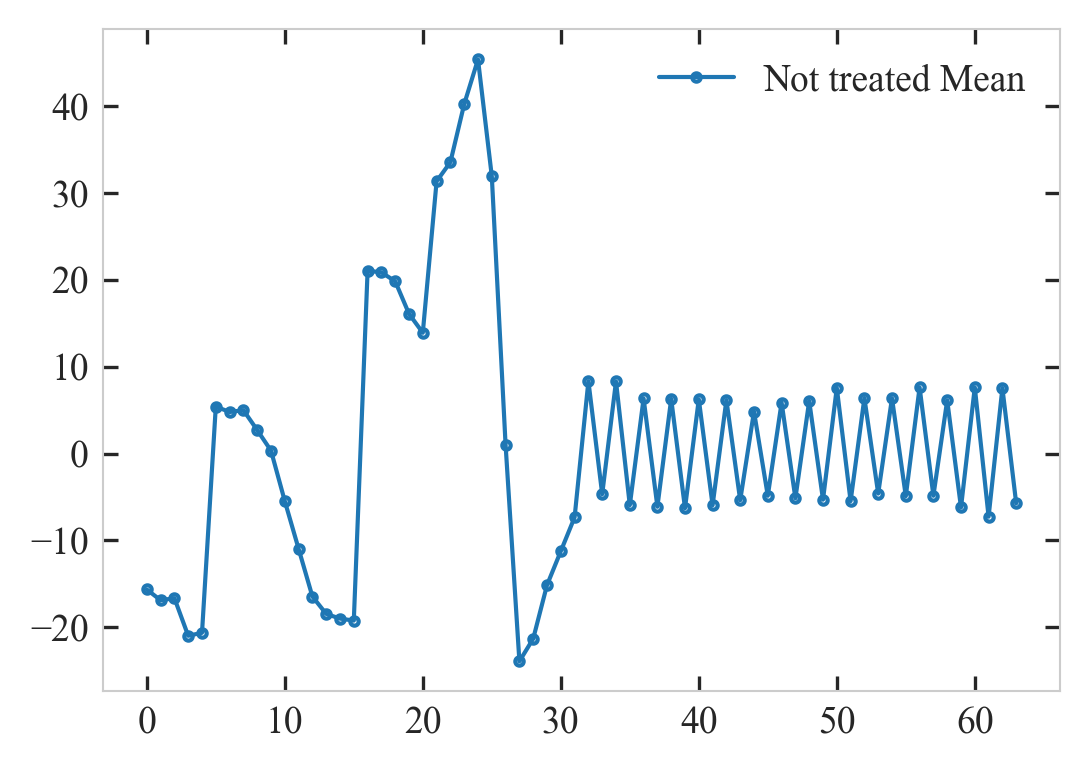

In [21]:
# allMeanClean = faultyExperiment.dataMeasurement.get_All_Cleaned_Data()
allMean = faultyExperiment.dataMeasurement.get_All_Mean_Data()
# noiseField = faultyExperiment.noiseMeasurement.get_All_Mean_Data()
plt.plot(allMean.values(), label = "Not treated Mean", marker = '.')
# plt.plot(allMeanClean.values(), label = "all Mean Clean")
# plt.plot(noiseField.values(),label="Noise")
plt.legend()